In [301]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/big-mart-sales-prediction-datasets/sample_submission.csv
/kaggle/input/big-mart-sales-prediction-datasets/train.csv
/kaggle/input/big-mart-sales-prediction-datasets/test.csv


Amaç: Test Verisi ile Satış Miktarını Tahmin Etme ve Sisteme Yükleme
y = Item_Outlet_Sales

In [302]:
train_data = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/train.csv")
test_data = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/test.csv")
sample_submission = pd.read_csv("/kaggle/input/big-mart-sales-prediction-datasets/sample_submission.csv")

## Değişken Açıklamaları

- **`Item_Identifier`**: Ürüne ait benzersiz kimlik (ID).  
- **`Item_Weight`**: Ürünün ağırlığı.  
- **`Item_Fat_Content`**: Ürünün yağ oranı (örn: *low fat* veya *regular*).  
- **`Item_Visibility`**: Ürünün mağazada diğer ürünlere göre ne kadar sergilendiği (% olarak ifade edilir).  
- **`Item_Type`**: Ürünün kategorisi (örn: içecek, yiyecek, temizlik malzemesi vb.).  
- **`Item_MRP`**: Ürünün maksimum perakende satış fiyatı (liste fiyatı).  
- **`Outlet_Identifier`**: Mağazaya ait benzersiz kimlik (ID).  
- **`Outlet_Establishment_Year`**: Mağazanın açıldığı yıl.  
- **`Outlet_Size`**: Mağazanın fiziksel büyüklüğü (örn: küçük, orta, büyük).  
- **`Outlet_Location_Type`**: Mağazanın bulunduğu şehrin türü (örn: kırsal, yarı kentsel, kentsel).  
- **`Outlet_Type`**: Mağazanın türü (örn: bakkal veya süpermarket).  
- **`Item_Outlet_Sales`**: Ürünün belirli bir mağazada gerçekleşen satış miktarı (tahmin edilecek hedef değişken).  


In [303]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [304]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [305]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [306]:
train_data["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [307]:
train_data["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

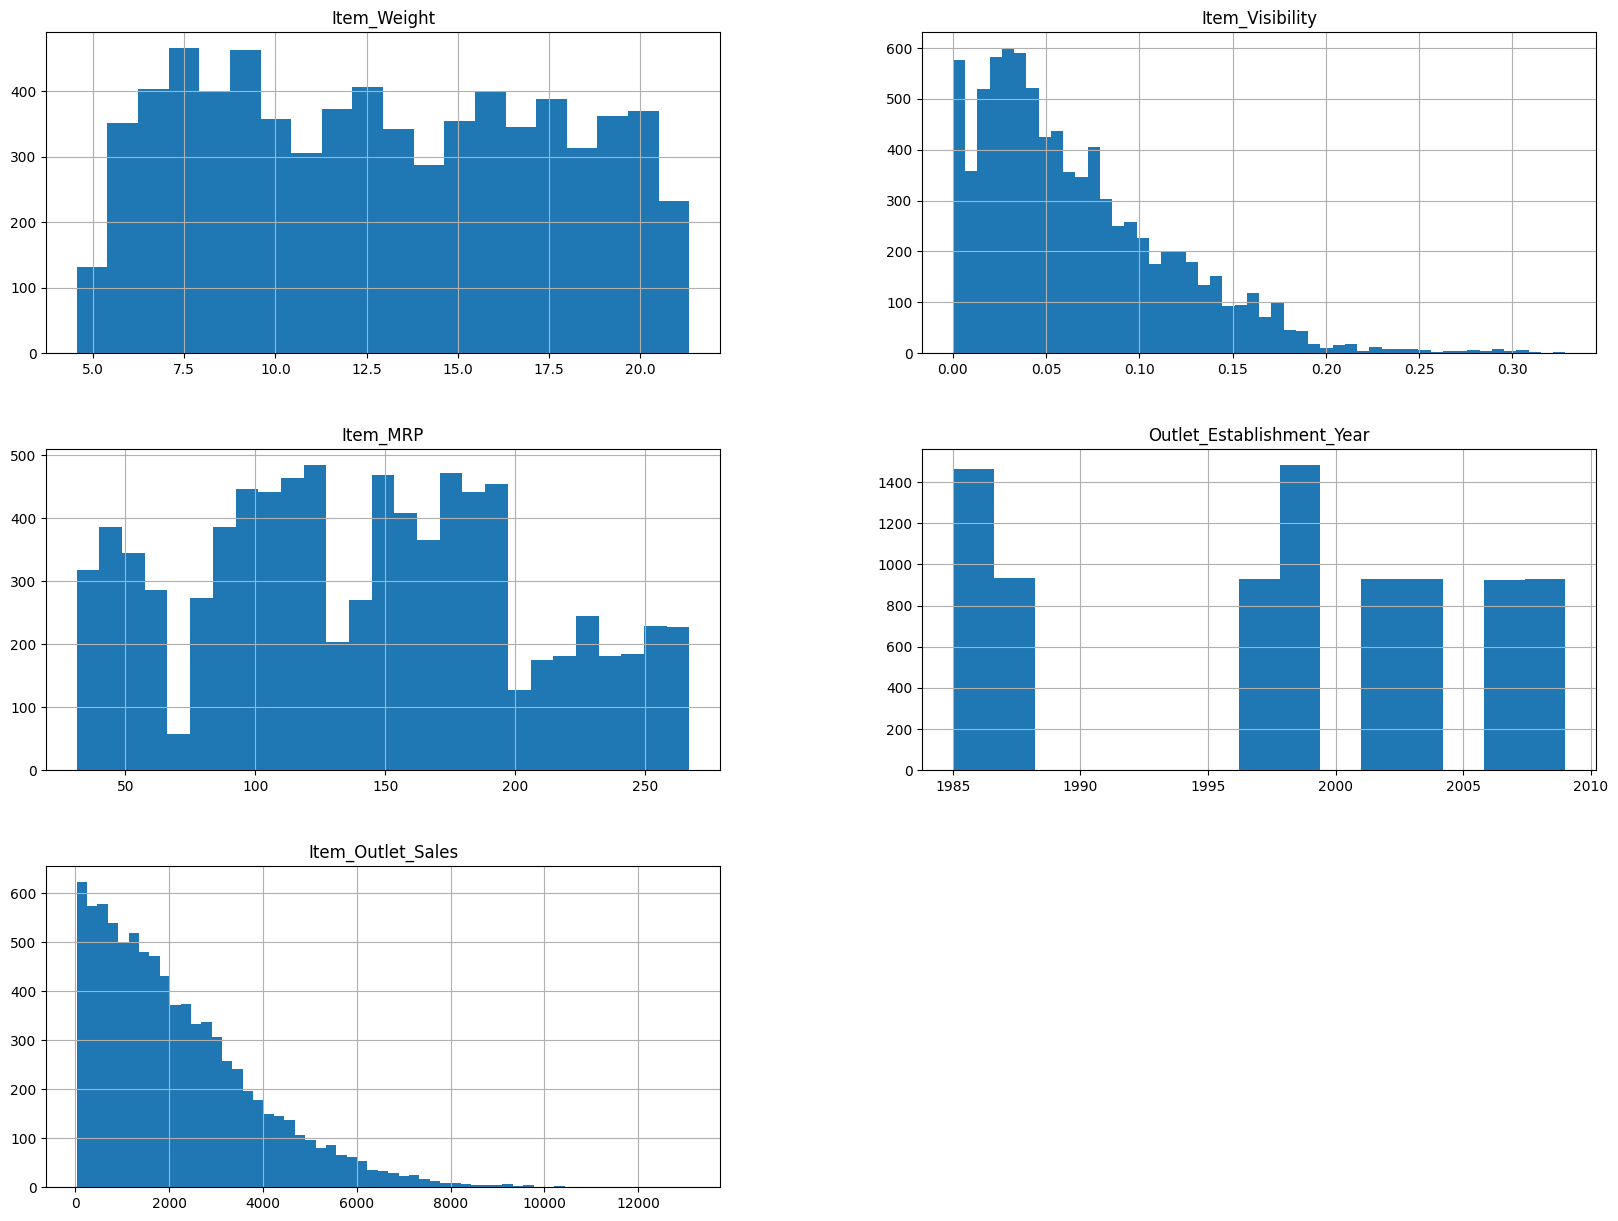

In [308]:
import matplotlib.pyplot as plt

hist = train_data.hist(bins="auto", figsize=(20,15))
plt.show()

In [309]:
drop_na_df = train_data.copy()
drop_na_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [310]:
drop_na_df.drop(columns=['Item_Identifier', 'Outlet_Identifier'], inplace=True)

cat_columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
drop_na_df = pd.get_dummies(drop_na_df, columns=cat_columns)

drop_na_df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,False,True,False,False,False,...,False,False,True,False,True,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


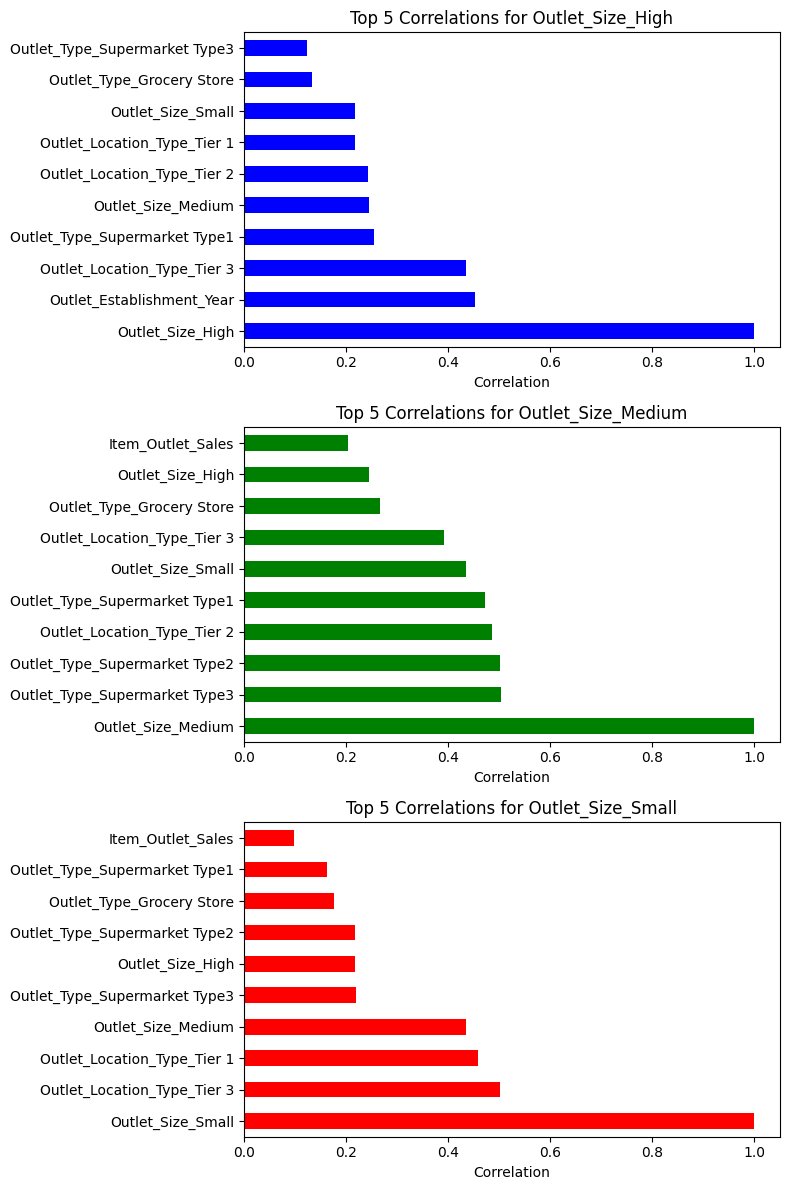

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = drop_na_df.corr()

# Outlet Size sütunları için mutlak korelasyonları sıralama
outlet_high_corr = correlation_matrix['Outlet_Size_High'].abs().sort_values(ascending=False).head(10)
outlet_medium_corr = correlation_matrix['Outlet_Size_Medium'].abs().sort_values(ascending=False).head(10)
outlet_small_corr = correlation_matrix['Outlet_Size_Small'].abs().sort_values(ascending=False).head(10)

# Her biri için grafikleri çizme
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

outlet_high_corr.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Correlations for Outlet_Size_High')
axes[0].set_xlabel('Correlation')

outlet_medium_corr.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Correlations for Outlet_Size_Medium')
axes[1].set_xlabel('Correlation')

outlet_small_corr.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Correlations for Outlet_Size_Small')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.show()


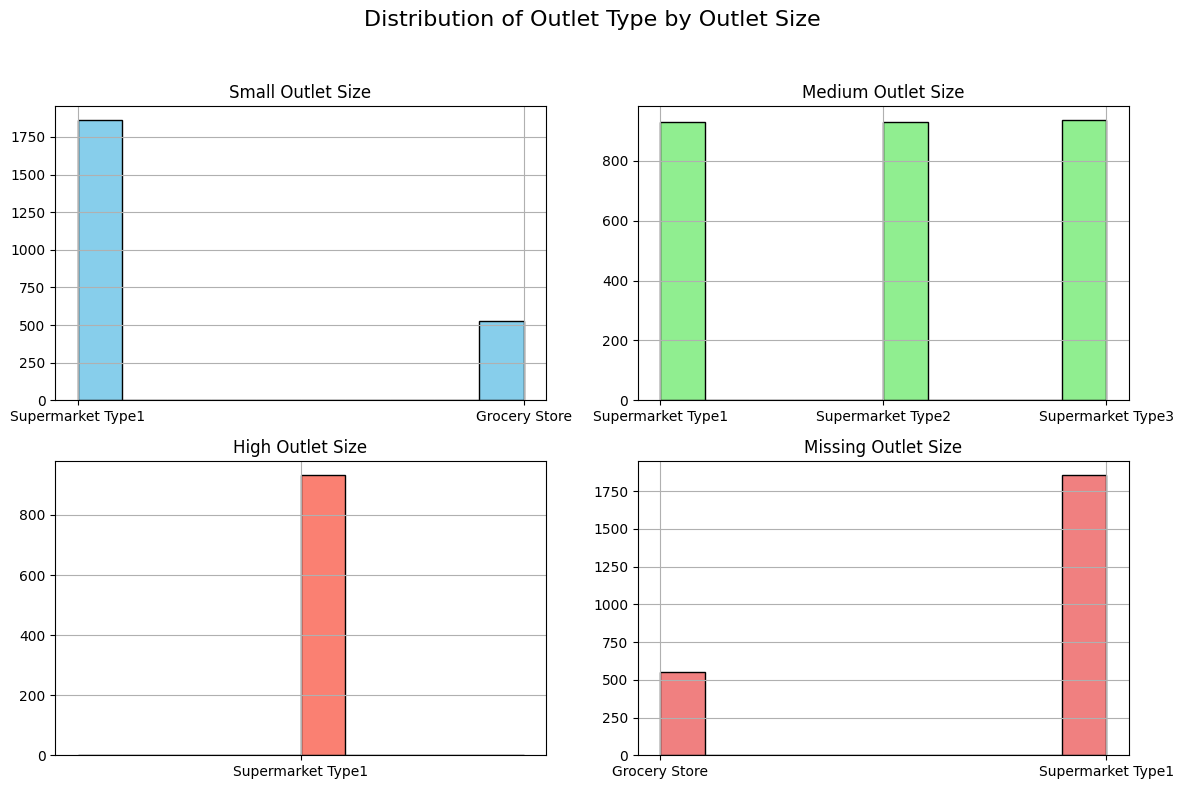

In [312]:
import matplotlib.pyplot as plt

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Outlet Type by Outlet Size', fontsize=16)

# Plot for 'Small' Outlet Size
train_data[train_data['Outlet_Size'] == 'Small']['Outlet_Type'].hist(ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title('Small Outlet Size')

# Plot for 'Medium' Outlet Size
train_data[train_data['Outlet_Size'] == 'Medium']['Outlet_Type'].hist(ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Medium Outlet Size')

# Plot for 'High' Outlet Size
train_data[train_data['Outlet_Size'] == 'High']['Outlet_Type'].hist(ax=axes[1, 0], color='salmon', edgecolor='black')
axes[1, 0].set_title('High Outlet Size')

# Plot for missing values (None) in Outlet Size
train_data[train_data['Outlet_Size'].isna()]['Outlet_Type'].hist(ax=axes[1, 1], color='lightcoral', edgecolor='black')
axes[1, 1].set_title('Missing Outlet Size')

# Adjust layout for better aesthetics
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [313]:
train_data.loc[(train_data['Outlet_Size'].isna()) & (train_data['Outlet_Type'] == 'Supermarket Type1'), 'Outlet_Size'] = 'High'
train_data.loc[(train_data['Outlet_Size'].isna()) & (train_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [314]:
outlet_small_corr = correlation_matrix['Item_Weight'].abs().sort_values(ascending=False).head(10)
outlet_small_corr

Item_Weight                        1.000000
Item_Type_Breads                   0.056124
Item_Type_Soft Drinks              0.051457
Item_Type_Hard Drinks              0.051200
Item_Type_Household                0.039400
Item_Type_Dairy                    0.036142
Item_Type_Baking Goods             0.035838
Item_Type_Canned                   0.034176
Item_Type_Fruits and Vegetables    0.032474
Item_Type_Others                   0.030165
Name: Item_Weight, dtype: float64

In [315]:
item_type_list = train_data['Item_Type'].unique().tolist()

In [316]:
for type in item_type_list:
    train_data.loc[(train_data['Item_Weight'].isna()) & (train_data['Item_Type'] == type), 'Item_Weight'] = train_data[train_data['Item_Type'] == type]['Item_Weight'].mean()

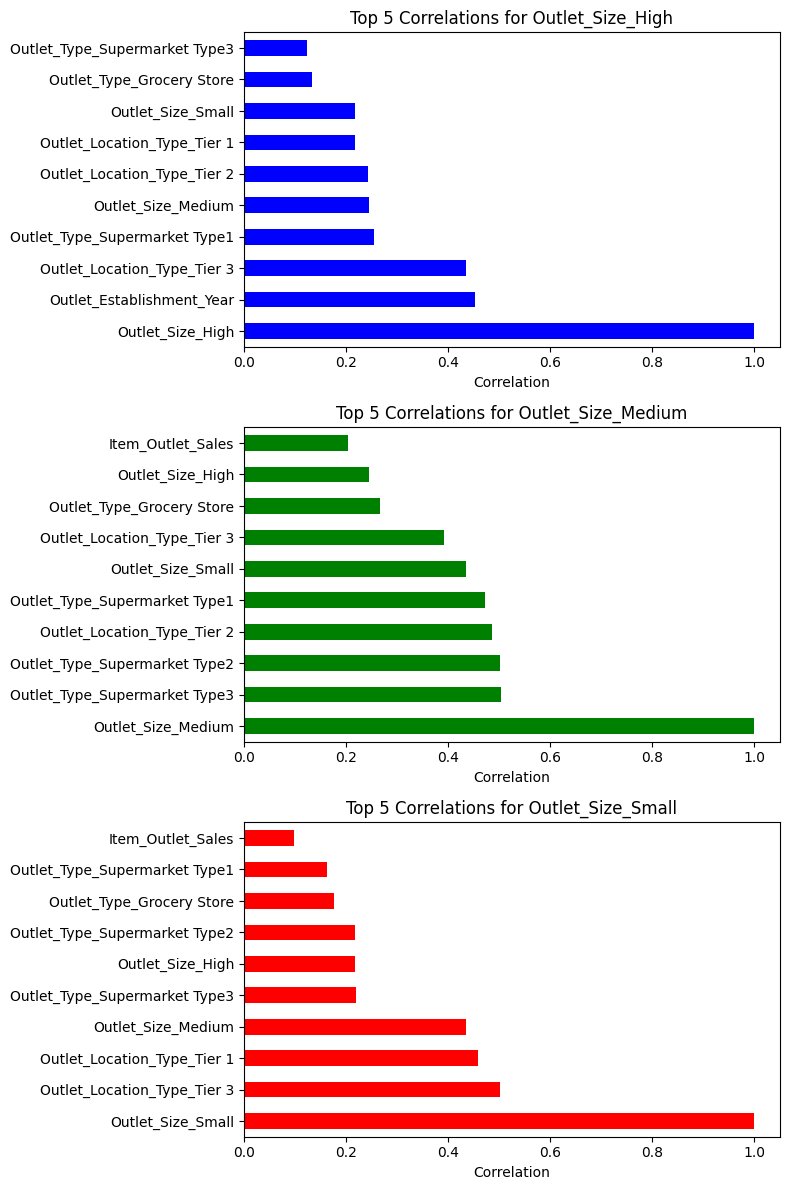

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = drop_na_df.corr()

# Outlet Size sütunları için mutlak korelasyonları sıralama
outlet_high_corr = correlation_matrix['Outlet_Size_High'].abs().sort_values(ascending=False).head(10)
outlet_medium_corr = correlation_matrix['Outlet_Size_Medium'].abs().sort_values(ascending=False).head(10)
outlet_small_corr = correlation_matrix['Outlet_Size_Small'].abs().sort_values(ascending=False).head(10)

# Her biri için grafikleri çizme
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

outlet_high_corr.plot(kind='barh', ax=axes[0], color='blue', title='Top 5 Correlations for Outlet_Size_High')
axes[0].set_xlabel('Correlation')

outlet_medium_corr.plot(kind='barh', ax=axes[1], color='green', title='Top 5 Correlations for Outlet_Size_Medium')
axes[1].set_xlabel('Correlation')

outlet_small_corr.plot(kind='barh', ax=axes[2], color='red', title='Top 5 Correlations for Outlet_Size_Small')
axes[2].set_xlabel('Correlation')

plt.tight_layout()
plt.show()

In [318]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [319]:
train_data['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [320]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,High,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [321]:
cat_data_corr = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Identifier', 'Outlet_Type']


correlation_matrix = train_data.drop(columns=cat_data_corr).corr()
correlation_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011620,0.025821,-0.008376,0.012088
Item_Visibility,-0.011620,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025821,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008376,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.012088,-0.128625,0.567574,-0.049135,1.000000


In [322]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


result = pd.DataFrame()

# ANOVA sonuçlarını analiz et ve bir DataFrame'e ekle
for col in cat_data_corr:
    model = ols(f'Item_Outlet_Sales ~ C({col})', data=train_data).fit()  # OLS modeli kur
    anova_table = sm.stats.anova_lm(model, typ=2)  # ANOVA testini yap
    
    # ANOVA tablosuna kolon ismini ekle ve sonuçları birleştir
    anova_table['Variable'] = col
    result = pd.concat([result, anova_table])

result

,sum_sq,df,F,PR(>F),Variable
C(Item_Identifier),1.059793e+10,1558.0,3.331446,1.273531e-252,Item_Identifier
Residual,1.421934e+10,6964.0,NaN,NaN,Item_Identifier
C(Item_Fat_Content),2.009519e+07,4.0,1.725709,1.412215e-01,Item_Fat_Content
Residual,2.479717e+10,8518.0,NaN,NaN,Item_Fat_Content
C(Item_Type),1.176182e+08,15.0,2.700653,3.884399e-04,Item_Type
Residual,2.469965e+10,8507.0,NaN,NaN,Item_Type
C(Outlet_Size),1.666775e+09,2.0,306.708812,2.369991e-129,Outlet_Size
Residual,2.315049e+10,8520.0,NaN,NaN,Outlet_Size
C(Outlet_Location_Type),3.103504e+08,2.0,53.947740,5.222817e-24,Outlet_Location_Type
Residual,2.450691e+10,8520.0,NaN,NaN,Outlet_Location_Type


In [323]:
train_data.drop(columns=['Item_Identifier'], inplace=True)


train_data = pd.get_dummies(train_data, columns=cat_data, drop_first=True)
train_data

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
1,5.920,0.019278,48.2692,2009,443.4228,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False
2,17.500,0.016760,141.6180,1999,2097.2700,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
3,19.200,0.000000,182.0950,1998,732.3800,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.930,0.000000,53.8614,1987,994.7052,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8519,8.380,0.046982,108.1570,2002,549.2850,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
8520,10.600,0.035186,85.1224,2004,1193.1136,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
8521,7.210,0.145221,103.1332,2009,1845.5976,False,True,False,False,False,...,True,False,False,False,False,False,False,False,True,False


In [324]:
for type in item_type_list:
    test_data.loc[(test_data['Item_Weight'].isna()) & (test_data['Item_Type'] == type), 'Item_Weight'] = test_data[test_data['Item_Type'] == type]['Item_Weight'].mean()

test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Supermarket Type1'), 'Outlet_Size'] = 'High'
test_data.loc[(test_data['Outlet_Size'].isna()) & (test_data['Outlet_Type'] == 'Grocery Store'), 'Outlet_Size'] = 'Small'

In [325]:
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64